In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_log_error
from datetime import date
from sklearn.metrics import mean_absolute_percentage_error
import warnings

warnings.filterwarnings('ignore')

vietcombank

In [ ]:
vcb = pd.read_csv('/content/VCB.csv',sep=";")
vcb= vcb.dropna() # Drop missing values
vcb = vcb.reset_index(drop=True) # Reset the index

vcb

,Date,Price,Open,High,Low,Vol.,Change %
0,01/05/2016,22899,23115,23384,22846,1.95M,0
1,01/06/2016,23169,22899,23277,22899,1.20M,0
2,01/07/2016,22899,23061,23115,22630,1.61M,0
3,01/08/2016,22738,22792,22953,22468,1.17M,0
4,01/11/2016,22576,22738,22846,22522,1.28M,0
...,...,...,...,...,...,...,...
1991,12/21/2023,80900,81000,81000,80300,2.03M,0
1992,12/22/2023,80900,80900,81100,80400,1.58M,0
1993,12/25/2023,81800,80900,81800,80700,1.30M,0
1994,12/26/2023,82800,82000,82800,82000,971.20K,0


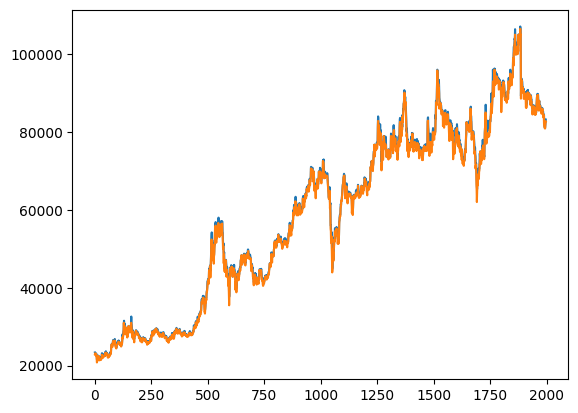

In [ ]:
# gán biến
y = vcb[['Price']] # chuỗi thời gian cần dự báo (biến phụ thuộc)
X = vcb[['High']] # các biến độc lập
plt.plot(X)
plt.plot(y)
plt.show()

In [ ]:
# chia train, test
train_size = int(0.7 * len(vcb))
test_size = len(vcb) - train_size

y_train = y[:train_size]
X_train = X[:train_size]
y_test = y[train_size:]
X_test = X[train_size:]

In [ ]:
# tạo mô hình SVR
svr_rbf = SVR(kernel='rbf', C=1000)
svr_rbf.fit(X_train, y_train)

svr_poly = SVR(kernel='poly', C=1000, degree = 2)
svr_poly.fit(X_train, y_train)

svr_sigmoid = SVR(kernel='sigmoid')
svr_sigmoid.fit(X_train, y_train)


SVR(kernel='sigmoid')

In [ ]:
# dự đoán giá đóng cửa của stock price trên tập kiểm tra
y_pred_rbf = svr_rbf.predict(X_test)vvv
y_pred_rbf = y_pred_rbf.reshape(-1,1)

y_pred_poly = svr_poly.predict(X_test)
y_pred_poly = y_pred_poly.reshape(-1,1)

y_pred_sigmoid = svr_sigmoid.predict(X_test)
y_pred_sigmoid= y_pred_sigmoid.reshape(-1,1)

In [ ]:
# tính toán độ chính xác của mô hình
mape_rbf = mean_absolute_percentage_error(y_test, y_pred_rbf) * 100
msle_rbf = mean_squared_log_error(y_test, y_pred_rbf)
rmse_rbf = np.sqrt(np.mean((y_pred_rbf - y_test)**2))

mape_poly = mean_absolute_percentage_error(y_test, y_pred_poly) *
msle_poly = mean_squared_log_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(np.mean((y_pred_poly - y_test)**2))

mape_sigmoid = mean_absolute_percentage_error(y_test, y_pred_sigmoid) * 100
msle_sigmoid = mean_squared_log_error(y_test, y_pred_sigmoid)
rmse_sigmoid = np.sqrt(np.mean((y_pred_sigmoid - y_test)**2))

In [ ]:
# in kết quả độ chính xác của mô hình
print("RBF MAPE:", mape_rbf)
print("RBF MSLE: ", msle_rbf)
print("RBF RMSE:", rmse_rbf)

print("Poly MAPE:", mape_poly)
print("Poly MSLE:", msle_poly)
print("Poly RMSE:", rmse_poly)

print("Sigmoid MAPE:", mape_sigmoid)
print("Sigmoid MSLE:", msle_sigmoid)
print("Sigmoid RMSE:", rmse_sigmoid)

RBF MAPE: 7.521141307752499
RBF MSLE:  0.02076325049513697
RBF RMSE: Price    11864.304689
dtype: float64
Poly MAPE: 12.452300527071372
Poly MSLE: 0.016323707663826105
Poly RMSE: Price    12592.501998
dtype: float64
Sigmoid MAPE: 42.67816754068682
Sigmoid MSLE: 0.3241313863593883
Sigmoid RMSE: Price    36896.188281
dtype: float64


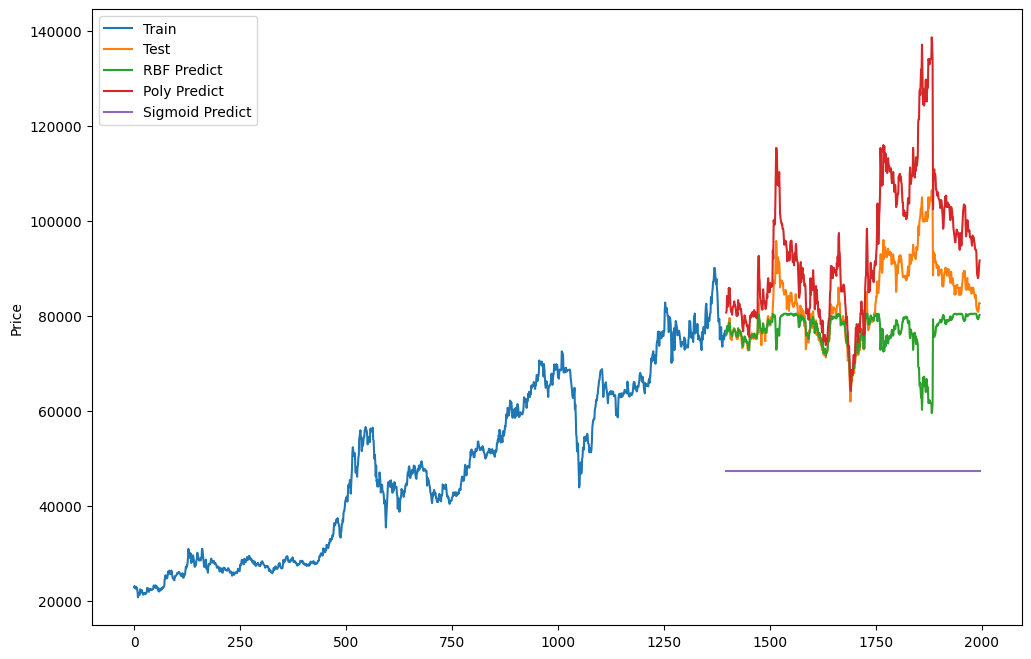

In [ ]:
#vẽ mô hình
plt.figure(figsize=(12, 8))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(X_test.index, y_pred_rbf, label='RBF Predict')
plt.plot(X_test.index, y_pred_poly, label='Poly Predict')
plt.plot(X_test.index, y_pred_sigmoid, label='Sigmoid Predict')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
#lấy giá trị Price của ngày cuối cùng trong dataset
last_index = vcb.index[-1]
last_row = vcb.tail(1)
last_data = last_row['Price'].values.reshape(-1,1)
last_data

array([[82700]])

In [ ]:
# tạo mảng chứa giá trị predict của 30 ngày tiếp theo
x_next_30_day_rbf = []
x_next_30_day_poly = []
x_next_30_day_sigmoid = []
index_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
# predict giá Price 30 ngày tiếp theo dựa vào giá Price của ngày trước đó
for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_day_rbf.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_day_poly.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

for i in range(30):
    x_pred_next = svr_sigmoid.predict(last_data)
    x_next_30_day_sigmoid.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

print("Kết quả dự đoán sử dụng RBF:", x_next_30_day_rbf)
print("Kết quả dự đoán sử dụng Poly:", x_next_30_day_poly)
print("Kết quả dự đoán sử dụng Poly:", x_next_30_day_sigmoid)

Kết quả dự đoán sử dụng RBF: [array([80068.45436229]), array([78774.75021294]), array([77879.06006781]), array([77178.26858635]), array([76590.96838957]), array([76075.9735779]), array([75609.42697127]), array([75176.17664631]), array([74765.91711299]), array([74371.25070249]), array([73986.62941633]), array([73607.74121583]), array([73231.1384018]), array([72854.00650548]), array([72474.01933884]), array([72089.24944792]), array([71698.11555792]), array([71299.35522409]), array([70892.01445308]), array([70475.44789378]), array([70049.3240842]), array([69613.63067471]), array([69168.67489119]), array([68715.07503726]), array([68253.73976076]), array([67785.83321317]), array([67312.72604631]), array([66835.93420169]), array([66357.04931456]), array([65877.66590743])]
Kết quả dự đoán sử dụng Poly: [array([65399.31109664]), array([64923.38216841]), array([64451.09620173]), array([63983.45421349]), array([63521.22045066]), array([63064.91580867]), array([62614.82315513]), array([62171.0016

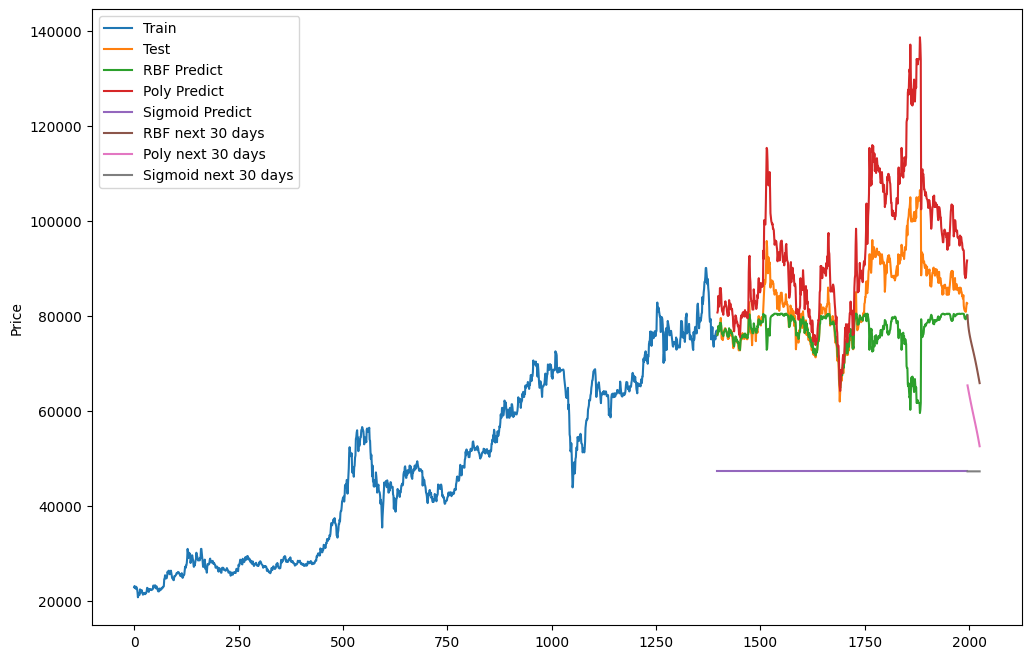

In [ ]:
#vẽ mô hình
plt.figure(figsize=(12, 8))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(X_test.index, y_pred_rbf, label='RBF Predict')
plt.plot(X_test.index, y_pred_poly, label='Poly Predict')
plt.plot(X_test.index, y_pred_sigmoid, label='Sigmoid Predict')

# Vẽ biểu đồ dự đoán sử dụng RBF
plt.plot(index_next_30_days,x_next_30_day_rbf, label='RBF next 30 days')
# Vẽ biểu đồ dự đoán sử dụng Poly
plt.plot(index_next_30_days,x_next_30_day_poly, label='Poly next 30 days')
# Vẽ biểu đồ dự đoán sử dụng Sigmoid
plt.plot(index_next_30_days,x_next_30_day_sigmoid, label='Sigmoid next 30 days')

plt.ylabel('Price')
plt.legend()
plt.show()

MB bank

In [ ]:
mbb = pd.read_csv('/content/MBB.csv')
mbb = mbb.dropna() # Drop missing values
mbb = mbb.reset_index(drop=True) # Reset the index

mbb

,Date,Price,Open,High,Low,Vol.,Change %
0,01/05/2016,4894,4894,4964,4894,1.07M,0
1,01/06/2016,4929,4894,4929,4894,670.50K,0
2,01/07/2016,4859,4929,4929,4859,1.61M,0
3,01/08/2016,4824,4824,4859,4789,1.73M,0
4,01/11/2016,4789,4824,4859,4789,1.12M,0
...,...,...,...,...,...,...,...
1991,12/21/2023,18150,18100,18150,18000,3.98M,0
1992,12/22/2023,18300,18150,18450,18100,8.55M,0
1993,12/25/2023,18400,18350,18550,18300,6.59M,0
1994,12/26/2023,18450,18400,18500,18300,4.26M,0


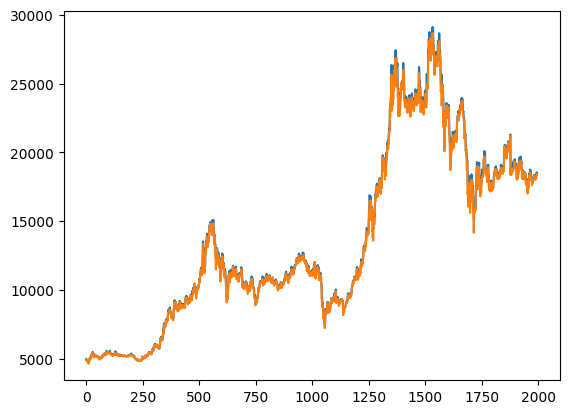

In [ ]:
# gán biến
y = mbb[['Price']] # chuỗi thời gian cần dự báo (biến phụ thuộc)
X = mbb[['High']] # các biến độc lập
plt.plot(X)
plt.plot(y)
plt.show()

In [ ]:
# chia train, test
train_size = int(0.7 * len(mbb))
test_size = len(mbb) - train_size

y_train = y[:train_size]
X_train = X[:train_size]
y_test = y[train_size:]
X_test = X[train_size:]

In [ ]:
# tạo mô hình SVR
svr_rbf = SVR(kernel='rbf', C=1000)
svr_rbf.fit(X_train, y_train)

svr_poly = SVR(kernel='poly', C=1000, degree = 2)
svr_poly.fit(X_train, y_train)

svr_sigmoid = SVR(kernel='sigmoid')
svr_sigmoid.fit(X_train, y_train)

SVR(kernel='sigmoid')

In [ ]:
# dự đoán giá đóng cửa của stock price trên tập kiểm tra
y_pred_rbf = svr_rbf.predict(X_test)
y_pred_rbf = y_pred_rbf.reshape(-1,1)

y_pred_poly = svr_poly.predict(X_test)
y_pred_poly = y_pred_poly.reshape(-1,1)

y_pred_sigmoid = svr_sigmoid.predict(X_test)
y_pred_sigmoid= y_pred_sigmoid.reshape(-1,1)

In [ ]:
# tính toán độ chính xác của mô hình
mape_rbf = mean_absolute_percentage_error(y_test, y_pred_rbf) * 100
msle_rbf = mean_squared_log_error(y_test, y_pred_rbf)
rmse_rbf = np.sqrt(np.mean((y_pred_rbf - y_test)**2))

mape_poly = mean_absolute_percentage_error(y_test, y_pred_poly) * 100
msle_poly = mean_squared_log_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(np.mean((y_pred_poly - y_test)**2))

mape_sigmoid = mean_absolute_percentage_error(y_test, y_pred_sigmoid) * 100
msle_sigmoid = mean_squared_log_error(y_test, y_pred_sigmoid)
rmse_sigmoid = np.sqrt(np.mean((y_pred_sigmoid - y_test)**2))

In [ ]:
# in kết quả độ chính xác của mô hình
print("RBF MAPE:", mape_rbf)
print("RBF MSLE: ", msle_rbf)
print("RBF RMSE:", rmse_rbf)

print("Poly MAPE:", mape_poly)
print("Poly MSLE:", msle_poly)
print("Poly RMSE:", rmse_poly)

print("Sigmoid MAPE:", mape_sigmoid)
print("Sigmoid MSLE:", msle_sigmoid)
print("Sigmoid RMSE:", rmse_sigmoid)

RBF MAPE: 1.7591998382538332
RBF MSLE:  0.001506038435358145
RBF RMSE: Price    977.546551
dtype: float64
Poly MAPE: 13.904138989132786
Poly MSLE: 0.022529398368107273
Poly RMSE: Price    4132.203761
dtype: float64
Sigmoid MAPE: 50.175419680828405
Sigmoid MSLE: 0.523396107408047
Sigmoid RMSE: Price    11194.278863
dtype: float64


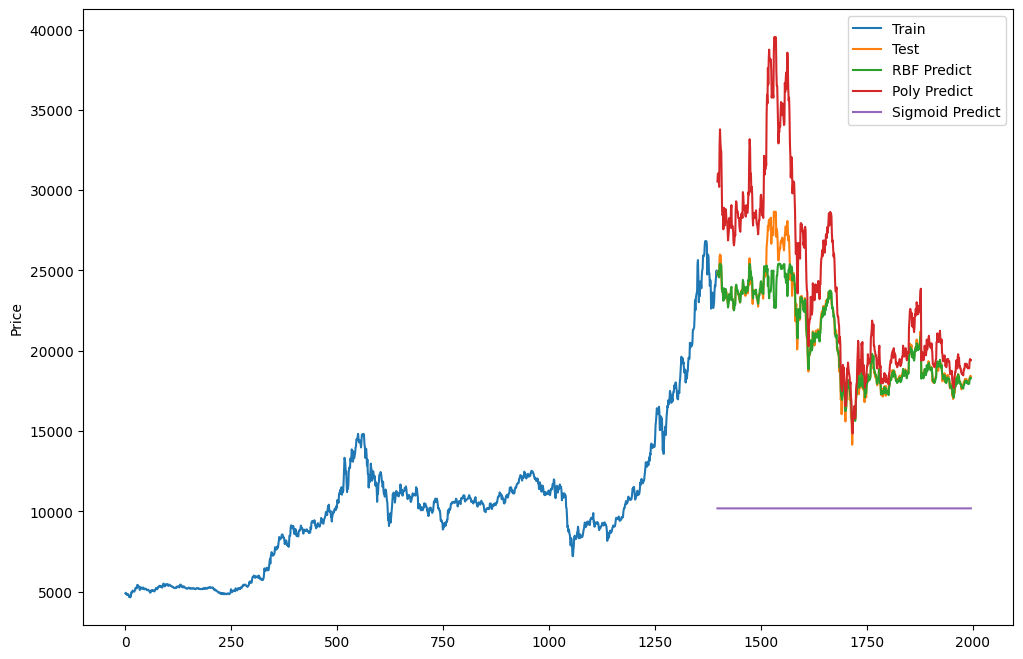

In [ ]:
#vẽ mô hình
plt.figure(figsize=(12, 8))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(X_test.index, y_pred_rbf, label='RBF Predict')
plt.plot(X_test.index, y_pred_poly, label='Poly Predict')
plt.plot(X_test.index, y_pred_sigmoid, label='Sigmoid Predict')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
# lấy giá trị Price của ngày cuối cùng trong dataset
last_index = mbb.index[-1]
last_row = mbb.tail(1)
last_data = last_row['Price'].values.reshape(-1,1)
last_data

array([[18400]])

In [ ]:
# tạo mảng chứa giá trị predict của 30 ngày tiếp theo
x_next_30_day_rbf = []
x_next_30_day_poly = []
x_next_30_day_sigmoid = []
index_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
# predict giá Price 30 ngày tiếp theo dựa vào giá Price của ngày trước đó
for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_day_rbf.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_day_poly.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

for i in range(30):
    x_pred_next = svr_sigmoid.predict(last_data)
    x_next_30_day_sigmoid.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

print("Kết quả dự đoán sử dụng RBF:", x_next_30_day_rbf)
print("Kết quả dự đoán sử dụng Poly:", x_next_30_day_poly)
print("Kết quả dự đoán sử dụng Poly:", x_next_30_day_sigmoid)

Kết quả dự đoán sử dụng RBF: [array([18188.40184788]), array([17980.37895243]), array([17774.65836733]), array([17570.15351278]), array([17365.94547711]), array([17161.27088625]), array([16955.51619485]), array([16748.21787303]), array([16539.06764514]), array([16327.92153023]), array([16114.81086871]), array([15899.95280045]), array([15683.75689631]), array([15466.8240643]), array([15249.93379541]), array([15034.01665274]), array([14820.11087252]), array([14609.30491383]), array([14402.6711445]), array([14201.19855774]), array([14005.73342782]), array([13816.93559302]), array([13635.25491018]), array([13460.92841587]), array([13293.99514478]), array([13134.32333205]), array([12981.64412884]), array([12835.58667101]), array([12695.71075704]), array([12561.53494496])]
Kết quả dự đoán sử dụng Poly: [array([12432.55919565]), array([12308.28211867]), array([12188.21342062]), array([12071.8823979]), array([11958.84335561]), array([11848.67876107]), array([11741.00081578]), array([11635.4519

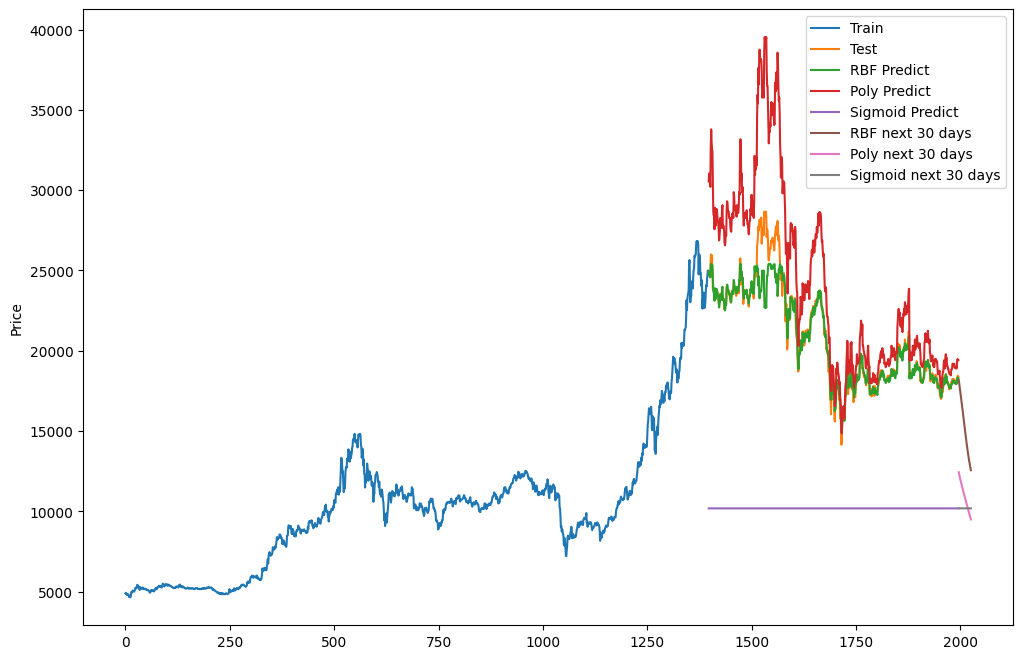

In [ ]:
#vẽ mô hình
plt.figure(figsize=(12, 8))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(X_test.index, y_pred_rbf, label='RBF Predict')
plt.plot(X_test.index, y_pred_poly, label='Poly Predict')
plt.plot(X_test.index, y_pred_sigmoid, label='Sigmoid Predict')

# Vẽ biểu đồ dự đoán sử dụng RBF
plt.plot(index_next_30_days,x_next_30_day_rbf, label='RBF next 30 days')
# Vẽ biểu đồ dự đoán sử dụng Poly
plt.plot(index_next_30_days,x_next_30_day_poly, label='Poly next 30 days')
# Vẽ biểu đồ dự đoán sử dụng Sigmoid
plt.plot(index_next_30_days,x_next_30_day_sigmoid, label='Sigmoid next 30 days')

plt.ylabel('Price')
plt.legend()
plt.show()

BIDV

In [ ]:
bidv = pd.read_csv('/content/BIDV.csv')
bidv = bidv.dropna() # Drop missing values
bidv = bidv.reset_index(drop=True) # Reset the index

bidv

,Date,Price,Open,High,Low,Vol.,Change %
0,01/05/2016,14155,14225,14366,14085,1.39M,0
1,01/06/2016,14225,14085,14296,14085,1.13M,0
2,01/07/2016,13592,14155,14225,13380,3.25M,0
3,01/08/2016,13240,13592,13592,12887,1.53M,0
4,01/11/2016,13380,13380,13592,13310,1.14M,0
...,...,...,...,...,...,...,...
1991,12/21/2023,41800,40900,41900,40900,1.14M,0
1992,12/22/2023,42450,41800,42450,41400,1.19M,0
1993,12/25/2023,43200,42500,43300,42000,1.17M,0
1994,12/26/2023,43000,43200,43550,42700,1.16M,0


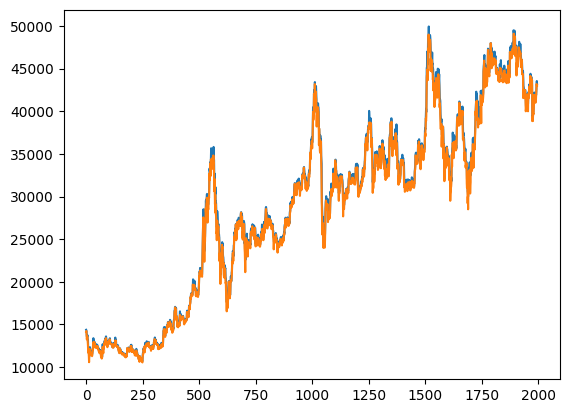

In [ ]:
# gán biến
y = bidv[['Price']] # chuỗi thời gian cần dự báo (biến phụ thuộc)
X = bidv[['High']] # các biến độc lập
plt.plot(X)
plt.plot(y)
plt.show()

In [ ]:
# chia train, test
train_size = int(0.7 * len(bidv))
test_size = len(bidv) - train_size

y_train = y[:train_size]
X_train = X[:train_size]
y_test = y[train_size:]
X_test = X[train_size:]

In [ ]:
# tạo mô hình SVR
svr_rbf = SVR(kernel='rbf', C=1000)
svr_rbf.fit(X_train, y_train)

svr_poly = SVR(kernel='poly', C=1000, degree = 2)
svr_poly.fit(X_train, y_train)

svr_sigmoid = SVR(kernel='sigmoid')
svr_sigmoid.fit(X_train, y_train)

SVR(kernel='sigmoid')

In [ ]:
# dự đoán giá đóng cửa của stock price trên tập kiểm tra
y_pred_rbf = svr_rbf.predict(X_test)
y_pred_rbf = y_pred_rbf.reshape(-1,1)

y_pred_poly = svr_poly.predict(X_test)
y_pred_poly = y_pred_poly.reshape(-1,1)

y_pred_sigmoid = svr_sigmoid.predict(X_test)
y_pred_sigmoid= y_pred_sigmoid.reshape(-1,1)

In [ ]:
# tính toán độ chính xác của mô hình
mape_rbf = mean_absolute_percentage_error(y_test, y_pred_rbf) * 100
msle_rbf = mean_squared_log_error(y_test, y_pred_rbf)
rmse_rbf = np.sqrt(np.mean((y_pred_rbf - y_test)**2))

mape_poly = mean_absolute_percentage_error(y_test, y_pred_poly) * 100
msle_poly = mean_squared_log_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(np.mean((y_pred_poly - y_test)**2))

mape_sigmoid = mean_absolute_percentage_error(y_test, y_pred_sigmoid) * 100
msle_sigmoid = mean_squared_log_error(y_test, y_pred_sigmoid)
rmse_sigmoid = np.sqrt(np.mean((y_pred_sigmoid - y_test)**2))

In [ ]:
# in kết quả độ chính xác của mô hình
print("RBF MAPE:", mape_rbf)
print("RBF MSLE: ", msle_rbf)
print("RBF RMSE:", rmse_rbf)

print("Poly MAPE:", mape_poly)
print("Poly MSLE:", msle_poly)
print("Poly RMSE:", rmse_poly)

print("Sigmoid MAPE:", mape_sigmoid)
print("Sigmoid MSLE:", msle_sigmoid)
print("Sigmoid RMSE:", rmse_sigmoid)

RBF MAPE: 7.550183474984511
RBF MSLE:  0.016158097181026978
RBF RMSE: Price    5212.207922
dtype: float64
Poly MAPE: 12.18790643261081
Poly MSLE: 0.01743041523246906
Poly RMSE: Price    6386.973271
dtype: float64
Sigmoid MAPE: 35.42299376000076
Sigmoid MSLE: 0.2185044322826921
Sigmoid RMSE: Price    15491.099615
dtype: float64


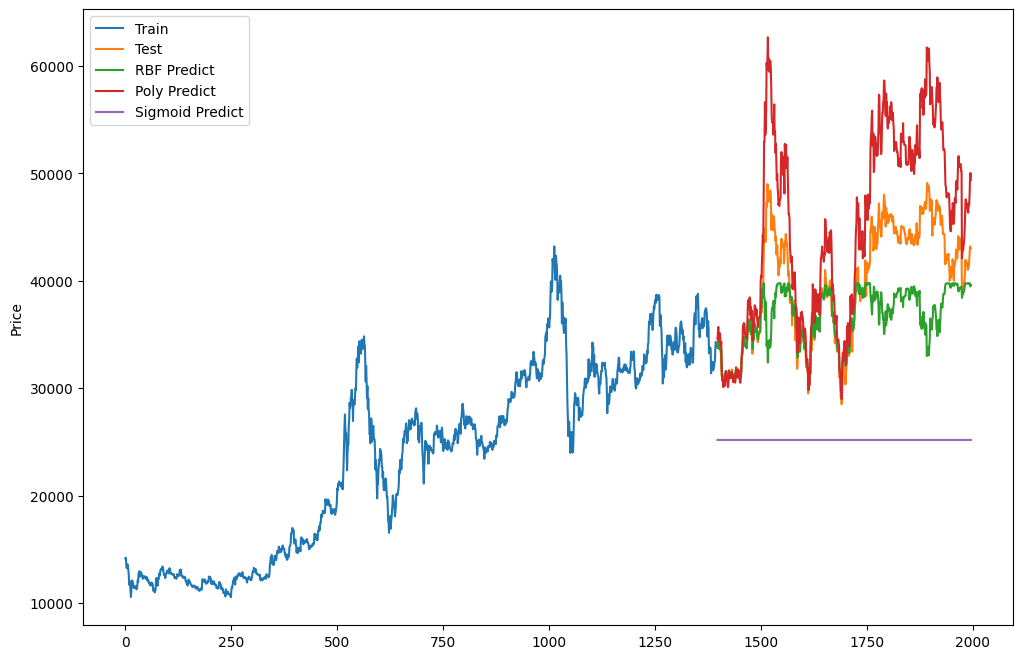

In [ ]:
#vẽ mô hình
plt.figure(figsize=(12, 8))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(X_test.index, y_pred_rbf, label='RBF Predict')
plt.plot(X_test.index, y_pred_poly, label='Poly Predict')
plt.plot(X_test.index, y_pred_sigmoid, label='Sigmoid Predict')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
# lấy giá trị Price của ngày cuối cùng trong dataset
last_index = bidv.index[-1]
last_row = bidv.tail(1)
last_data = last_row['Price'].values.reshape(-1,1)
last_data

array([[43000]])

In [ ]:
# tạo mảng chứa giá trị predict của 30 ngày tiếp theo
x_next_30_day_rbf = []
x_next_30_day_poly = []
x_next_30_day_sigmoid = []
index_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
# predict giá Price 30 ngày tiếp theo dựa vào giá Price của ngày trước đó
for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_day_rbf.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_day_poly.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

for i in range(30):
    x_pred_next = svr_sigmoid.predict(last_data)
    x_next_30_day_sigmoid.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

print("Kết quả dự đoán sử dụng RBF:", x_next_30_day_rbf)
print("Kết quả dự đoán sử dụng Poly:", x_next_30_day_poly)
print("Kết quả dự đoán sử dụng Poly:", x_next_30_day_sigmoid)

Kết quả dự đoán sử dụng RBF: [array([39664.43105184]), array([38882.50042925]), array([38311.20392152]), array([37833.79354211]), array([37405.09887792]), array([37002.46311015]), array([36612.84250286]), array([36228.1737158]), array([35843.41275822]), array([35455.61567633]), array([35063.46017511]), array([34666.94229953]), array([34267.1158557]), array([33865.8123417]), array([33465.32765361]), array([33068.0971315]), array([32676.39923209]), array([32292.12728742]), array([31916.65222693]), array([31550.77661888]), array([31194.762119]), array([30848.40382076]), array([30511.12569886]), array([30182.07758292]), array([29860.22185265]), array([29544.40469722]), array([29233.41134533]), array([28926.0072396]), array([28620.96823312]), array([28317.10309891])]
Kết quả dự đoán sử dụng Poly: [array([28013.27140283]), array([27708.3993692]), array([27401.49590392]), array([27091.67047733]), array([26778.15409618]), array([26460.32406485]), array([26137.73259357]), array([25810.13850091]

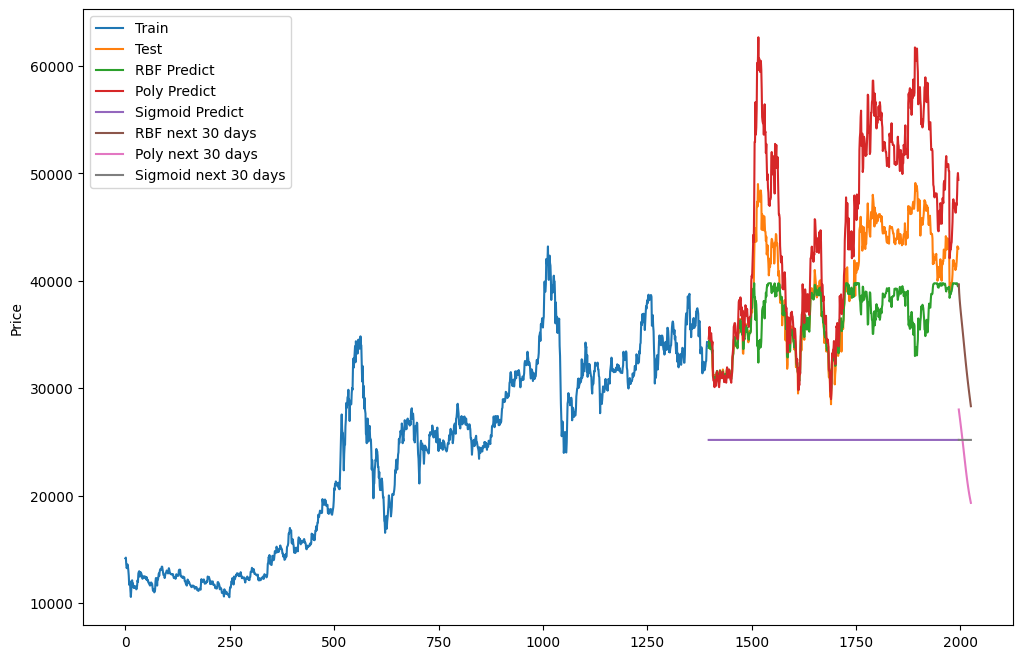

In [ ]:
#vẽ mô hình
plt.figure(figsize=(12, 8))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(X_test.index, y_pred_rbf, label='RBF Predict')
plt.plot(X_test.index, y_pred_poly, label='Poly Predict')
plt.plot(X_test.index, y_pred_sigmoid, label='Sigmoid Predict')

# Vẽ biểu đồ dự đoán sử dụng RBF
plt.plot(index_next_30_days,x_next_30_day_rbf, label='RBF next 30 days')
# Vẽ biểu đồ dự đoán sử dụng Poly
plt.plot(index_next_30_days,x_next_30_day_poly, label='Poly next 30 days')
# Vẽ biểu đồ dự đoán sử dụng Sigmoid
plt.plot(index_next_30_days,x_next_30_day_sigmoid, label='Sigmoid next 30 days')

plt.ylabel('Price')
plt.legend()
plt.show()